In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


{'test.csv': b"employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score\r\n8724,Technology,region_26,Bachelor's,m,sourcing,1,24,,1,1,0,77\r\n74430,HR,region_4,Bachelor's,f,other,1,31,3,5,0,0,51\r\n72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1,4,0,0,47\r\n38562,Procurement,region_2,Bachelor's,f,other,3,31,2,9,0,0,65\r\n64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4,7,0,0,61\r\n46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3,2,0,0,68\r\n54542,Finance,region_2,Bachelor's,m,other,1,33,5,3,1,0,57\r\n67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3,3,0,0,85\r\n66174,Technology,region_7,Master's & above,m,other,1,51,4,11,0,0,75\r\n76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5,2,1,0,76\r\n60245,Sales & Marketing,region_16,Bachelor's,m,sourcing,2,40,5,12,1,0,50\r\n42639,Sales & Marketing,region_17,Master's & above,m,sourcing,1,40,3,10,0,0,

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(10)

employee_id         department  ... avg_training_score is_promoted
0        65438  Sales & Marketing  ...                 49           0
1        65141         Operations  ...                 60           0
2         7513  Sales & Marketing  ...                 50           0
3         2542  Sales & Marketing  ...                 50           0
4        48945         Technology  ...                 73           0
5        58896          Analytics  ...                 85           0
6        20379         Operations  ...                 59           0
7        16290         Operations  ...                 63           0
8        73202          Analytics  ...                 83           0
9        28911  Sales & Marketing  ...                 54           0

[10 rows x 14 columns]

In [0]:
train=pd.get_dummies(train, dummy_na=True)
test=pd.get_dummies(test, dummy_na=True)

In [7]:
test.head(10)

employee_id  ...  recruitment_channel_nan
0         8724  ...                        0
1        74430  ...                        0
2        72255  ...                        0
3        38562  ...                        0
4        64486  ...                        0
5        46232  ...                        0
6        54542  ...                        0
7        67269  ...                        0
8        66174  ...                        0
9        76303  ...                        0

[10 rows x 64 columns]

In [0]:
#int or float
train['previous_year_rating'].fillna(train['previous_year_rating'].median(), inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].median(), inplace=True)

In [0]:
#type converter
train['previous_year_rating']=train.previous_year_rating.astype(int)
test['previous_year_rating']=test.previous_year_rating.astype(int)

In [14]:
train.dtypes, test.dtypes

(employee_id                     int64
 no_of_trainings                 int64
 age                             int64
 previous_year_rating            int64
 length_of_service               int64
                                 ...  
 gender_nan                      uint8
 recruitment_channel_other       uint8
 recruitment_channel_referred    uint8
 recruitment_channel_sourcing    uint8
 recruitment_channel_nan         uint8
 Length: 65, dtype: object, employee_id                     int64
 no_of_trainings                 int64
 age                             int64
 previous_year_rating            int64
 length_of_service               int64
                                 ...  
 gender_nan                      uint8
 recruitment_channel_other       uint8
 recruitment_channel_referred    uint8
 recruitment_channel_sourcing    uint8
 recruitment_channel_nan         uint8
 Length: 64, dtype: object)

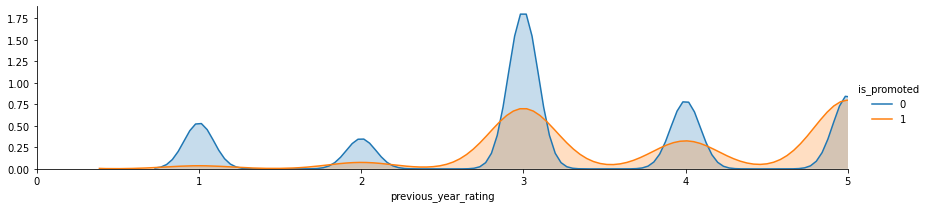

In [15]:
facet = sns.FacetGrid(train, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'previous_year_rating',shade= True)
facet.set(xlim=(0, train['previous_year_rating'].max()))
facet.add_legend()
 
plt.show()

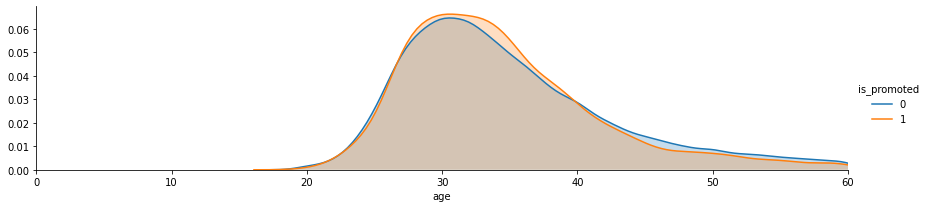

In [16]:
facet = sns.FacetGrid(train, hue="is_promoted",aspect=4)
facet.map(sns.kdeplot,'age',shade= True)
facet.set(xlim=(0, train['age'].max()))
facet.add_legend()
 
plt.show()


In [18]:
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [19]:
train_data = train.drop('is_promoted', axis=1)
target = train['is_promoted']

train_data.shape, target.shape

((54808, 64), (54808,))

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [22]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.9171684  0.91461412 0.91516147 0.91881044 0.91534392 0.91169495
 0.90749863 0.91735085 0.91678832 0.91313869]


In [23]:
# kNN Score
round(np.mean(score)*100, 2)

91.48

In [24]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.9058566  0.90384966 0.90074804 0.90147783 0.89928845 0.90494435
 0.90111294 0.90202518 0.89908759 0.89616788]


In [25]:
# decision tree Score
round(np.mean(score)*100, 2)

90.15

In [26]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93577814 0.93158183 0.93723773 0.93723773 0.93285897 0.93267652
 0.92738551 0.93340631 0.93375912 0.93175182]


In [27]:
# Random Forest Score
round(np.mean(score)*100, 2)

93.34

In [28]:
X_train = train_data
Y_train =target
X_test = test.copy()
X_train.shape, Y_train.shape, X_test.shape

((54808, 64), (54808,), (23490, 64))

In [29]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [30]:
#K-nearest (k-NN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

92.52

In [31]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [32]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [0]:
Y_pred = Y_pred.tolist()
for i in range(len(Y_pred)):
    if Y_pred[i] == 1:
        Y_pred[i] = 1
    else:
        Y_pred[i] = 0
y_pred = np.array(Y_pred)

In [0]:
submission = pd.DataFrame({
        "employee_id": test["employee_id"],
        "is_promoted": Y_pred
    })
submission.to_csv('./submission.csv', index=False)

In [35]:
submission['is_promoted'].value_counts()

0    22913
1      577
Name: is_promoted, dtype: int64

In [36]:
submission = pd.read_csv('submission.csv')
submission.head()

employee_id  is_promoted
0         8724            0
1        74430            0
2        72255            0
3        38562            0
4        64486            0

In [0]:
from google.colab import files
files.download('submission.csv') 